**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
with open('/content/sample_data/weather.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
modelo = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)



> **Vamos testar o modelo?**



In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array([False, False, False,  True])



> **Será se o modelo acertou?**



In [ ]:
y_teste

array([False, False, False,  True])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[3, 0],
       [0, 1]])

1.0

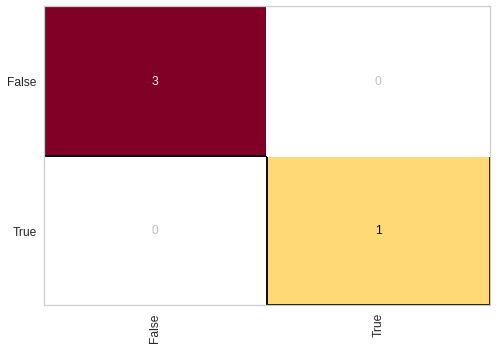

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Vamos ver os atributos que o Random considerou como mais importantes?**

In [ ]:
print(modelo.feature_importances_) 

[0.009   0.14275 0.      0.025   0.      0.      0.      0.0245  0.054
 0.74475]


**Vamos agora analisar como estes dados estão distribuídos?**

In [ ]:
Base = pd.read_csv('/content/sample_data/weather.nominal.csv', ',')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,overcast,cool,normal,True,yes
6,sunny,mild,high,False,no
7,sunny,cool,normal,False,yes
8,rainy,mild,normal,False,yes
9,sunny,mild,normal,True,yes


In [ ]:
Base['outlook'].describe()

count        13
unique        3
top       sunny
freq          5
Name: outlook, dtype: object

KeyError: ignored

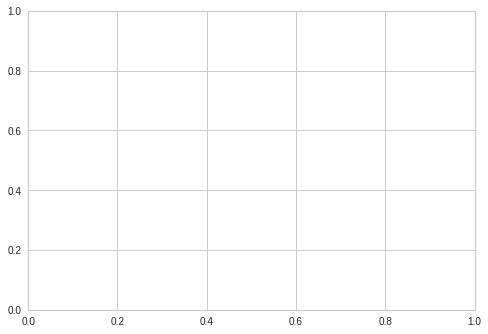

In [ ]:
import matplotlib.pyplot as plt
Base.boxplot(column=['outlook','temperature','humidity','windy'])

In [ ]:
sns.boxplot(data=Base,x="play", y="outlook")

TypeError: ignored

In [ ]:
sns.boxplot(data=Base,x="play", y="temperature")

TypeError: ignored

In [ ]:
sns.boxplot(data=Base,x="play", y="humidity")

TypeError: ignored

TypeError: ignored

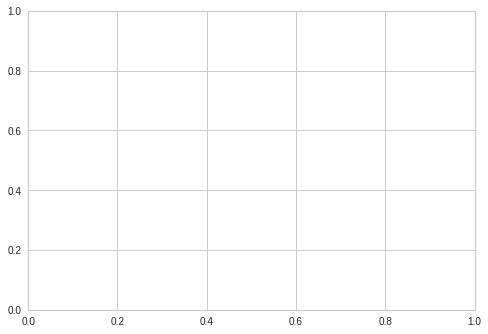

In [ ]:
sns.boxplot(data=Base,x="play", y="windy")